In [88]:
import torch
###########Added#############
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        print("CUDA available ! default device set to GPU!")
        return torch.device('cuda')
    else:
        print("ERROR : CUDA device unavailable running on CPU...")
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""   
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    if not isinstance(data, torch.Tensor):
        data = torch.from_numpy(data)
    data = data.float()
    return data.cpu().to(device, non_blocking=False)
###########Added#############

C:\Users\kheli\AppData\Local\Programs\Python\Python39\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
import cv2
import numpy as np

l = [[[0,0,0],[0,0, 0],[0,00,0]],[[0,0, 0],[0,6, 0],[0,0, 0]],[[255,0, 80],[55,0, 80],[255,60, 80]]]
l = np.array(l) 
print(l.shape)
img = l
cv2.imwrite("test.jpg",img)

(3, 3, 3)


True

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [2, 2, 2,  ..., 0, 0, 0],
        [2, 2, 2,  ..., 0, 0, 0],
        [2, 2, 2,  ..., 0, 0, 0]], dtype=torch.uint8)

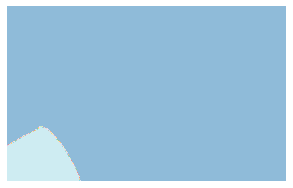

In [12]:
import PIL
from fastai.basics import *
from fastai.vision import * 
from fastai.vision.all import *
from fastai.callback.all import *
from numpy import dtype, uint16 
import torch
get_msk = 'D:/Work/Faghihi SideQuests/portTroisRivieres/data/labels/2021.07.26_04335.png'
msk = PILMask.create(get_msk)
msk.show()
tensor(msk)

In [1]:
import cupy as cp

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Generate universe variables
#   * Quality and service on subjective ranges [0, 10]
#   * Tip has a range of [0, 25] in units of percentage points

x_qual = np.arange(0, 11, 1,dtype=float)
x_serv = np.arange(0, 11, 1,dtype=float)
x_tip  = np.arange(0, 26, 1,dtype=float)


C:\Users\kheli\AppData\Local\Programs\Python\Python39\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


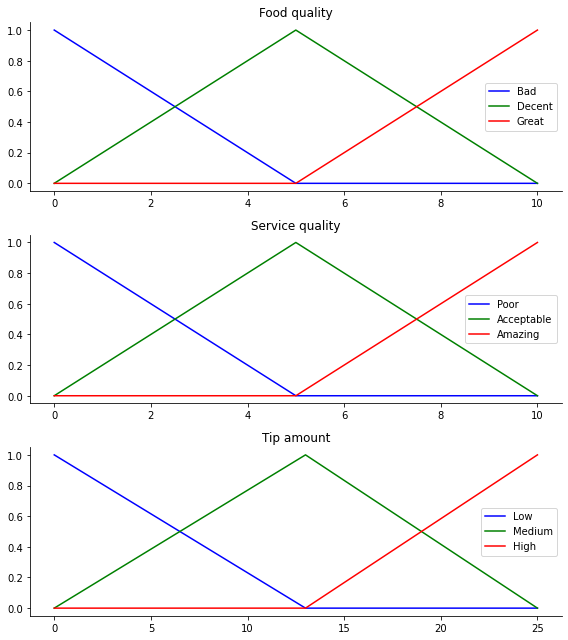

In [164]:

# Generate fuzzy membership functions
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()

ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()

ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [166]:
print("sci-kit fuzzy:")
import time
start_time = time.time()
SIZE = 30000
values = np.random.uniform(high = 9. , low = 0., size = SIZE)
 
for i in range(50):
    # We need the activation of our fuzzy membership functions at these valuess.
    # The exact valuess 6.5 and 9.8 do not exist on our universes...
    # This is what fuzz.interp_membership exists for!
    qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, values)
    qual_level_md = fuzz.interp_membership(x_qual, qual_md, values)
    qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, values)
    serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, values)
    serv_level_md = fuzz.interp_membership(x_serv, serv_md, values)
    serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, values)

    # Now we take our rules and apply them. Rule 1 concerns bad food OR service.
    # The OR operator means we take the maximum of these two.
    active_rule1 = np.fmax(qual_level_lo, serv_level_lo)

    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`
    for i, v in enumerate(active_rule1):
        tip_activation_lo = np.fmin(v, tip_lo)  # removed entirely to 0

    # For rule 2 we connect acceptable service to medium tipping
        tip_activation_md = np.fmin(serv_level_md[i], tip_md)

        # For rule 3 we connect high service OR high food with high tipping
        active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
        tip_activation_hi = np.fmin(active_rule3[i], tip_hi)

print(f"tip_activation {tip_activation_hi}")
print("---fuzzified in %s seconds ---" % (time.time() - start_time))


sci-kit fuzzy:
---fuzzified in 0.0009970664978027344 seconds ---
---fuzzified in 0.0009965896606445312 seconds ---
---fuzzified in 0.0009970664978027344 seconds ---
---fuzzified in 0.0009965896606445312 seconds ---
---fuzzified in 0.0009982585906982422 seconds ---
---fuzzified in 0.0009953975677490234 seconds ---
---fuzzified in 0.0009963512420654297 seconds ---
---fuzzified in 0.0009970664978027344 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.001988649368286133 seconds ---
---fuzzified in 0.0019898414611816406 seconds ---
---fuzzified in 0.0009965896606445312 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0009968280792236328 seconds ---
---fuzzified in 0.0009965896606445312 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0010001659393310547 seconds ---
---fuzzified in 0.0010724067687988281 seconds ---
---fuzzified in 0.0009613037109375 seconds ---
---fuzzified in 0.00095725059

In [168]:
x_qual = cp.array(x_qual, dtype = float)
x_qual = cp.array(x_serv, dtype = float)
x_tip = cp.array(x_tip, dtype = float)
x_serv = cp.array(x_serv, dtype = float)
qual_lo = cp.array(qual_lo, dtype = float)
qual_md = cp.array(qual_md, dtype = float)
qual_hi = cp.array(qual_hi, dtype = float)
serv_lo = cp.array(serv_lo, dtype = float)
serv_md = cp.array(serv_md, dtype = float)
serv_hi = cp.array(serv_hi, dtype = float)
tip_lo = cp.array(tip_lo, dtype = float)
tip_hi = cp.array(tip_hi, dtype = float)
tip_md = cp.array(tip_md, dtype = float)

values = cp.array(values)

In [150]:
import time
start_time = time.time()

for i in range(100):
    # We need the activation of our fuzzy membership functions at these values.
    # The exact values 6.5 and 9.8 do not exist on our universes...
    # This is what fuzz.interp_membership exists for!
    qual_level_lo = fuzz.interp_membership_lx(x_qual, qual_lo, values)
    qual_level_md = fuzz.interp_membership_lx(x_qual, qual_md, values)
    qual_level_hi = fuzz.interp_membership_lx(x_qual, qual_hi, values)
    serv_level_lo = fuzz.interp_membership_lx(x_serv, serv_lo, values)
    serv_level_md = fuzz.interp_membership_lx(x_serv, serv_md, values)
    serv_level_hi = fuzz.interp_membership_lx(x_serv, serv_hi, values)

    # Now we take our rules and apply them. Rule 1 concerns bad food OR service.
    # The OR operator means we take the maximum of these two.
    active_rule1 = cp.fmax(qual_level_lo, serv_level_lo)

    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`
    for i, v in enumerate(active_rule1):
        tip_activation_lo = cp.fmin(v, tip_lo)  # removed entirely to 0

    # For rule 2 we connect acceptable service to medium tipping
        tip_activation_md = cp.fmin(serv_level_md[i], tip_md)

        # For rule 3 we connect high service OR high food with high tipping
        active_rule3 = cp.fmax(qual_level_hi, serv_level_hi)
        tip_activation_hi = cp.fmin(active_rule3[i], tip_hi)


print(f"tip_activation {tip_activation_hi}")
print("---fuzzified in %s seconds ---" % (time.time() - start_time))

---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0009963512420654297 seconds ---
---fuzzified in 0.0 seconds ---
tip_activation [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01306652 0.01306652 0.01306652 0.01306652
 0.01306652 0.01306652 0.01306652 0.01306652 0.01306652 0.01306652
 0.01306652 0.01306652]
---fuzzified in 1.4771349430084229 seconds ---


In [95]:
from numba import cuda, float64
import numpy as np

@cuda.jit
def mins_kernel(A, B, res):
    i , j = cuda.grid(2)
    if i < res.shape[0] and j < res.shape[1]:
        tmp = min(A[i],B[j])
        res[i,j] = min(A[i],tmp)

In [63]:
b = min(B)
min(A[0],b)


array(1.)

In [162]:
A = cp.random.uniform(0,3,30000, dtype= np.float64)
B = cp.random.uniform(0,3,26, dtype= np.float64)
C = cp.zeros((A.shape[0],B.shape[0]), dtype=np.float64)


TPB = (1024,1024)
BPG_x = int(np.ceil(C.shape[0] / TPB[0]))
BPG_y = int(np.ceil(C.shape[0] / TPB[1]))
BPG = (BPG_x, BPG_y)

print(C)

mins_kernel[TPB,BPG](A,B,C)

print(C)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.52706114 1.93348471 0.71179462 ... 0.84073822 0.55546857 0.2590751 ]
 [0.17778282 0.17778282 0.17778282 ... 0.17778282 0.17778282 0.17778282]
 [0.52706114 0.74051407 0.71179462 ... 0.74051407 0.55546857 0.2590751 ]
 ...
 [0.52706114 1.71362361 0.71179462 ... 0.84073822 0.55546857 0.2590751 ]
 [0.16677072 0.16677072 0.16677072 ... 0.16677072 0.16677072 0.16677072]
 [0.12121921 0.12121921 0.12121921 ... 0.12121921 0.12121921 0.12121921]]


In [45]:
cuda.detect()

Found 1 CUDA devices
id 0    b'NVIDIA GeForce RTX 3050 Ti Laptop GPU'                              [SUPPORTED]
                      Compute Capability: 8.6
                           PCI Device ID: 0
                              PCI Bus ID: 1
                                    UUID: GPU-f8892726-30ca-8364-fa41-194bfdaee225
                                Watchdog: Enabled
                            Compute Mode: WDDM
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported


True

In [6]:
import numpy as np

lst1 = [[['1' , '1' , '3'],['1' , '1' , '3'],['1' , '1' , '3']],[['1' , '1' , '3'],['1' , '1' , '3'],['1' , '1' , '3']]]
ar = np.array(lst1)

print(ar)
print(ar.shape)
resh = np.reshape(ar, (3,3,2))
print(resh)
print(resh.shape)



[[['1' '1' '3']
  ['1' '1' '3']
  ['1' '1' '3']]

 [['1' '1' '3']
  ['1' '1' '3']
  ['1' '1' '3']]]
(2, 3, 3)
[[['1' '1']
  ['3' '1']
  ['1' '3']]

 [['1' '1']
  ['3' '1']
  ['1' '3']]

 [['1' '1']
  ['3' '1']
  ['1' '3']]]
(3, 3, 2)


(4, 5)


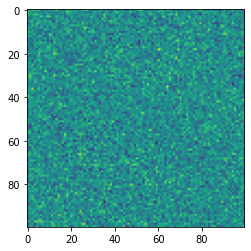

In [31]:
import numpy as np
import matplotlib.pyplot as plt
a = np.array([[1,2,3,4,5],[9,8,9,5,1],[1,2,3,4,5],[1,2,3,4,5]])

print(a.shape)
for i in range(10):
    a = np.random.randn(100,100) * 255
    plt.imshow(a)

In [169]:
import time
start_time = time.time()

for i in range(50):
    # We need the activation of our fuzzy membership functions at these values.
    # The exact values 6.5 and 9.8 do not exist on our universes...
    # This is what fuzz.interp_membership exists for!
    qual_level_lo = fuzz.interp_membership_lx(x_qual, qual_lo, values)
    qual_level_md = fuzz.interp_membership_lx(x_qual, qual_md, values)
    qual_level_hi = fuzz.interp_membership_lx(x_qual, qual_hi, values)
    serv_level_lo = fuzz.interp_membership_lx(x_serv, serv_lo, values)
    serv_level_md = fuzz.interp_membership_lx(x_serv, serv_md, values)
    serv_level_hi = fuzz.interp_membership_lx(x_serv, serv_hi, values)

    # Now we take our rules and apply them. Rule 1 concerns bad food OR service.
    # The OR operator means we take the maximum of these two.
    active_rule1 = cp.fmax(qual_level_lo, serv_level_lo)

    # Now we apply this by clipping the top off the corresponding output
    # membership function with `np.fmin`
    
tip_activation_lo = cp.zeros((active_rule1.shape[0],tip_lo.shape[0]), dtype=np.float64)
tip_activation_md = cp.zeros((active_rule1.shape[0],tip_lo.shape[0]), dtype=np.float64)
tip_activation_hi = cp.zeros((active_rule1.shape[0],tip_lo.shape[0]), dtype=np.float64)


TPB = (1024,1024)
BPG_x = int(np.ceil(tip_activation_lo.shape[0] / TPB[0]))
BPG_y = int(np.ceil(tip_activation_lo.shape[0] / TPB[1]))
BPG = (BPG_x, BPG_y)

mins_kernel[TPB,BPG](active_rule1,tip_lo,tip_activation_lo)
mins_kernel[TPB,BPG](serv_level_md,tip_lo,tip_activation_md)
active_rule3 = cp.fmax(qual_level_hi, serv_level_hi)
mins_kernel[TPB,BPG](active_rule3,tip_lo,tip_activation_hi)


print(f"tip_activation {tip_activation_hi}")
print("---fuzzified in %s seconds ---" % (time.time() - start_time))

---fuzzified in 0.00099945068359375 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.000993967056274414 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0010123252868652344 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0010929107666015625 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0008854866027832031 seconds ---
---fuzzified in 0.0010046958923339844 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0009872913360595703 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified in 0.0 seconds ---
---fuzzified 

In [119]:
gpu = cuda.get_current_device()
print("name = %s" % gpu.name)
print("maxThreadsPerBlock = %s" % str(gpu.MAX_THREADS_PER_BLOCK))
print("maxBlockDimX = %s" % str(gpu.MAX_BLOCK_DIM_X))
print("maxBlockDimY = %s" % str(gpu.MAX_BLOCK_DIM_Y))
print("maxBlockDimZ = %s" % str(gpu.MAX_BLOCK_DIM_Z))
print("maxGridDimX = %s" % str(gpu.MAX_GRID_DIM_X))
print("maxGridDimY = %s" % str(gpu.MAX_GRID_DIM_Y))
print("maxGridDimZ = %s" % str(gpu.MAX_GRID_DIM_Z))
print("maxSharedMemoryPerBlock = %s" % str(gpu.MAX_SHARED_MEMORY_PER_BLOCK))
print("asyncEngineCount = %s" % str(gpu.ASYNC_ENGINE_COUNT))
print("canMapHostMemory = %s" % str(gpu.CAN_MAP_HOST_MEMORY))
print("multiProcessorCount = %s" % str(gpu.MULTIPROCESSOR_COUNT))
print("warpSize = %s" % str(gpu.WARP_SIZE))
print("unifiedAddressing = %s" % str(gpu.UNIFIED_ADDRESSING))
print("pciBusID = %s" % str(gpu.PCI_BUS_ID))
print("pciDeviceID = %s" % str(gpu.PCI_DEVICE_ID))

name = b'NVIDIA GeForce RTX 3050 Ti Laptop GPU'
maxThreadsPerBlock = 1024
maxBlockDimX = 1024
maxBlockDimY = 1024
maxBlockDimZ = 64
maxGridDimX = 2147483647
maxGridDimY = 65535
maxGridDimZ = 65535
maxSharedMemoryPerBlock = 49152
asyncEngineCount = 5
canMapHostMemory = 1
multiProcessorCount = 20
warpSize = 32
unifiedAddressing = 1
pciBusID = 1
pciDeviceID = 0


In [121]:
int(np.ceil(tip_activation_lo.shape[0] / TPB[0]))

196

In [40]:

x_qual = to_device(x_qual,device)
x_qual = to_device(x_serv, device)
x_tip = to_device(x_tip, device)
x_serv = to_device(x_serv, device)
qual_lo = to_device(qual_lo, device)
qual_md = to_device(qual_md, device)
qual_hi = to_device(qual_hi, device)
serv_lo = to_device(serv_lo, device)
serv_md = to_device(serv_md, device)
serv_hi = to_device(serv_hi, device)

value = torch.tensor([[1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8,1.,2.,5.,4.5,8]], requires_grad=False)
"""tip_lo = torch.from_numpy(tip_lo)
tip_hi = torch.from_numpy(tip_hi)
tip_md = torch.from_numpy(tip_md)"""
value = value.to(device=device)
tip_lo = to_device(tip_lo, device)
tip_hi = to_device(tip_hi,device)
tip_md = to_device(tip_md,device)

indecies = torch.floor(value).long()
import time
from numba import jit, cuda

@jit(target_backend ="cuda")
def run_fuzzy_loop():
    start_time = time.time()
    for i in range(1000):
        # We need the activation of our fuzzy membership functions at these values.
        # The exact values 6.5 and 9.8 do not exist on our universes...
        # This is what fuzz.interp_membership exists for!
        qual_level_lo = fuzz.interp_membership_lx(x_qual, qual_lo, value, indecies)
        qual_level_md = fuzz.interp_membership_lx(x_qual, qual_md, value, indecies)
        qual_level_hi = fuzz.interp_membership_lx(x_qual, qual_hi, value, indecies)
        serv_level_lo = fuzz.interp_membership_lx(x_serv, serv_lo, value, indecies)
        serv_level_md = fuzz.interp_membership_lx(x_serv, serv_md, value, indecies)
        serv_level_hi = fuzz.interp_membership_lx(x_serv, serv_hi, value, indecies)
        

        # Now we take our rules and apply them. Rule 1 concerns bad food OR service.
        # The OR operator means we take the maximum of these two.
        active_rule1 = torch.fmax(qual_level_lo, serv_level_lo)
        for i, v in enumerate(active_rule1[0,]):
            tip_activation_lo = torch.fmin(v, tip_lo)  # removed entirely to 0

        # For rule 2 we connect acceptable service to medium tipping
            tip_activation_md = torch.fmin(serv_level_md[0,i], tip_md)

            # For rule 3 we connect high service OR high food with high tipping
            active_rule3 = torch.fmax(qual_level_hi, serv_level_hi)
            tip_activation_hi = torch.fmin(active_rule3[0,i], tip_hi)
    print(f"tip_activation {tip_activation_hi}")
    print("---fuzzified in %s seconds ---" % (time.time() - start_time))

run_fuzzy_loop()



TypeError: expected np.ndarray (got cupy._core.core.ndarray)

In [ ]:
# Aggregate all three output membership functions together
aggregated = np.fmax(tip_activation_lo,
                     np.fmax(tip_activation_md, tip_activation_hi))

# Calculate defuzzified result
tip = fuzz.defuzz(x_tip, aggregated, 'centroid')
tip_activation = fuzz.interp_membership(x_tip, aggregated, tip)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([tip, tip], [0, tip_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print(f"tip == {tip}")

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.